<h3> Final Project on Generative Adversial Network(GAN)</h3>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam,RMSprop
import numpy as np
from keras.datasets import mnist
import os
from keras.layers import Input
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.
C:\Users\nikhi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nikhi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nikhi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nikhi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

<h5>We have choosen Fashion_mnist dataset for this project</h5>

<h5> Fashion MNIST Data </h5>
Fashion_MNIST Data set contains 70,000 greyscale images of 10 categories clothing as (28x28) pixel images. Here we use 60000 images as Training Data and rest 10000 as Testing Data. Data such as dresses, shoes, t-shirts and more of this data Set is available in Keras. This classification problem is more difficult than MNIST and by using deep learning convolutional neural networks we can achieve high results on the holdout test dataset ranging between 90 to 95%.  

So, we can use it from the Keras. As an alternative to MNIST Fashion-MNIST is proposed. Even though it is not solved, the possibility of achieving error rates of 10 or less consistently is prominent. Similar to MNIST, for solving image classification using convolutional neural networks it could be a useful starting point.

<h5>Importing the Fashion MNIST Data Set</h5>

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()#loading fashion mnist dataset from thr keras Data Sets

<h5>Exploring the Data Set<h5>

In [3]:
seri=pd.Series(y_train)
k=[]
for i in range(10):
    k.append(seri[seri == i].index[0])
Labels=['T-shirt/top','Trouser',' Pullover', 'Dress','Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot']
df=pd.DataFrame(Labels,columns=['Different Categorical Variables'])
df

,Different Categorical Variables
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


<h5>plotting the images of the 10 different categorical variables</h5>

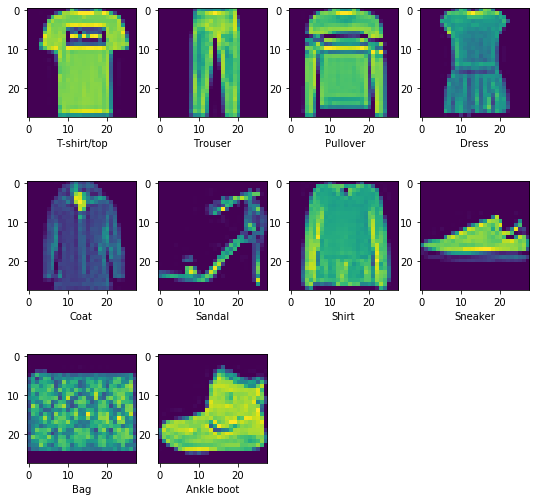

In [4]:
plt.figure(figsize=(9,9))
j=0
for i in k:
    plt.subplot(3,4, j+1)
    plt.imshow(x_train[i]) 
    #plt.colorbar()
    plt.grid(False)
    plt.xlabel(Labels[j])
    j=j+1
plt.show() 

<h5>Preprocessing the data</h5>

In [5]:
np.random.seed(10)
noisedim = 100# Dimensions of noise
batchsize = 16# batchsize
steps_per_epoch = 3750# Steps that we need to run in each epoch
epochs = 1
row, cols, channels = 28, 28, 1
optimizer = Adam(0.0002, 0.5)# Herere learning rate for the Adam optimizer is 0.0002

In [6]:
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = x_train.reshape(-1, row*cols*channels)# reshaping the training data

<h5> GAN(Generative Adversarial Networks) </h5>

In machine learning, being an unsupervised learning task Generative modeling involves automatically detecting and learning input's regularities or patterns in a way to use the model in giving new examples that could have been taken from the original dataset. The following are the better way of developing the generative model by assuming the problem as a supervised learning one with 2 sub-models: the generator model which we develop to create new examples and the discriminator model which try to classify those examples into real or fake. This field deliver on the assurance of generative models in their skill to create real-life examples mostly in image translation tasks such as translating photos of the night to day or winter to summer and also in creating photos of scenes, objects or humans in a realistic way that it is harder to know the difference.

The generative adversarial networks have the potential to do everything from image translation, to facial manipulation or in the creation of medical drugs or in super-resolution in images or much more. The generative adversarial networks perform by balancing generator and discriminator neural networks against each other in order to understand and learn the probability distribution of a dataset.

A generative adversarial network have two parts:

The generator learns to output the feasible data. The instances which are generated would be the negative examples for the discriminator.

The discriminator tries to tell apart the generator data if it is fake or real. For generating unlikely results the discriminator gets penalized.

When the training of the data starts, the generator tries to generate the fake data while the discriminator rapidly detects that it is fake.

In [7]:
%%html
<img src="GAN_1.jpg",width=500,height=100>

<h5>Defining Generator</h5> 

In Neural Network, generator is the model which transforms the function. Generator just takes input as random variable. The output will be returned only after the input data is trained and random variable will followthe distribution. 

The main aim of the geneartor is to make discriminator wrong and to make fool of the discrminator. That's the reason the generative neural netwok will be trained the data for maximising the error classification. This error classification is in between generated data and the true data. 

For training the data in generator it requires a strong integration inbetween discriminator and the generator. This should be stronger than that in the discriminator.

Here we considered Leaky ReLUs. Because it allows small and non zero gradient for the units which are not in active mode. All advanced activations in Keras, including LeakyReLU, are available as layers, and not as activations.


In [8]:
def gen():
    gen = Sequential()
    
    gen.add(Dense(256, input_dim=noisedim))# Dense Layer which takes the input as noise and gives 256 outputs
    gen.add(LeakyReLU(0.2)) #Leaky ReLUs allow a small, non-zero gradient when the unit is not active.
    gen.add(Dense(512))
    gen.add(LeakyReLU(0.2))
    gen.add(Dense(1024))
    gen.add(LeakyReLU(0.2))
    gen.add(Dense(row*cols*channels, activation='tanh'))#converting the noise into 28 x 28 x 1 images
    gen.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return gen

<h5>Discriminator</h5>

In Generative Adversarial Networks, discriminator is a classifier. This discriminator is used to identify the real data vs the data has been generated by generator. Discriminator use random netwrok architecture for classifiying the data with respective the type of the data. 

The training data from the discriminator comes from 2 sources: A) The first one is the real dat instances. In which this is a general and real pictures of the people. At the time of training this discriminator uses this real ime data as positive example for instances. B) The second source is from fake data. For considering the negative examples the discriminator use these data as negative examples.

The main aim of the discriminator is to identify from the data which is fake. So, for minimising the final classification error, the discriminative neural network is been trained. For the training data for each and every iteration, to increase the classification error in the weights is been updated from the generative network. This makes the error decreases.

Here we considered Leaky ReLUs. Because it allows small and non zero gradient for the units which are not in active mode. All advanced activations in Keras, including LeakyReLU, are available as layers, and not as activations.

In [9]:
def disc():
    disc = Sequential() 
    disc.add(Dense(1024, input_dim=row*cols*channels))
    disc.add(LeakyReLU(0.2))#Leaky ReLUs allow a small, non-zero gradient when the unit is not active
    disc.add(Dense(512))
    disc.add(LeakyReLU(0.2))
    disc.add(Dense(256))
    disc.add(LeakyReLU(0.2))    
    disc.add(Dense(1, activation='sigmoid'))# Output layer with sigmoid activation function 
    disc.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5),metrics=['accuracy'])
    return disc

For discriminator, we have added 3 dense layers with inputs dimentions for the first dense layer is (28x28x1) with output of 1024. For second dense layer, the input is of 1024 and the output of 512. For third dense layer, the input is of 512 and with output of 256. Output layer with sigmoid activation function.

For Generator, we have added 3 dense layers with inputs dimentions for the first dense layer with input as noise and output of 256. For second dense layer, the input is of 256 and the output of 512. For third dense layer, the input is of 512 and with output of 1024. Converting the noise into 28 x 28 x 1 images

In [10]:
#We are building GAN by combining Generator and Discriminator
disc = disc()
gen = gen()
print('Discriminator Summary')
disc.summary()
print('Generator Summary')
gen.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Discriminator Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
____

<h5> Our model containing Discriminator and Genator </h5>

The training for the model have been done for the combination of generator and discriminator. This makes the generatorto understand the discriminator which can update the values by itself for more effective.
In which this model has the input of 100 from noise dimentions and output of 1 shape.

In [11]:
disc.trainable = False#Freezing all the layers in the disciminator
ganinput = Input(shape=(noisedim,))
fakeimage = gen(ganinput)# Generator generating the fake image
ganoutput = disc(fakeimage)
gann = Model(ganinput, ganoutput)
gann.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5),metrics=['accuracy'])
gann.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


The GAN needs to be train the model of the generator and discriminator at once. For this we have added 2 for loops for the epoch so that it fits the model on the batches. The prediction for the generator is from sample of the random noise from the normal distribution. From sampling the random elements from the training data realx has been created. From the input data which is both real and fake it is combined into a single variable. The batch size for the disc_y is setup as 0.9 for label for the soft values. Variable dloss is for training the discriminator on batch. Then gloss is used for training the generator on batch. 
The variables generate, discriminate is used to store the list ofthe fenerator loss and discriminator loss.

In [12]:
generate=[]
discriminate=[]
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batchsize, noisedim))#Generating random noise
        fakex = gen.predict(noise)# Getting noisy image generated from the generator
        #print(fake_x)
        realx = x_train[np.random.randint(0, x_train.shape[0], size=batchsize)]#Randomly selecting images from our training data 
        x = np.concatenate((realx, fakex))#concatenating our real and fake images
        disc_y = np.zeros(2*batchsize)#creating a matrix of zeros
        disc_y[:batchsize] = 0.9
        dloss = disc.train_on_batch(x, disc_y)#d_loss will give us the output of accuracy and the loss of the discriminator
        """
        The input for the disciminator will be real image and fake image.
        """
        ygen = np.ones(batchsize)#creating a matix of ones
        gloss = gann.train_on_batch(noise, ygen)#g_loss will give us the output of accuracy and the loss of the generator
    print(f'Epoch: {epoch} \t Discriminator (Loss): {dloss[0]}, \t Generator Loss: {gloss[0]}')
    generate.append(gloss[0])
    discriminate.append(dloss[0])

C:\Users\nikhi\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch: 0 	 Discriminator (Loss): 0.5928928852081299, 	 Generator Loss: 1.2000901699066162


In [13]:
def plotimages(noise):
    pics = gen.predict(noise)
    plt.figure(figsize=(10, 10))
    for i, image in enumerate(pics):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((row,cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((row,cols, channels)))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

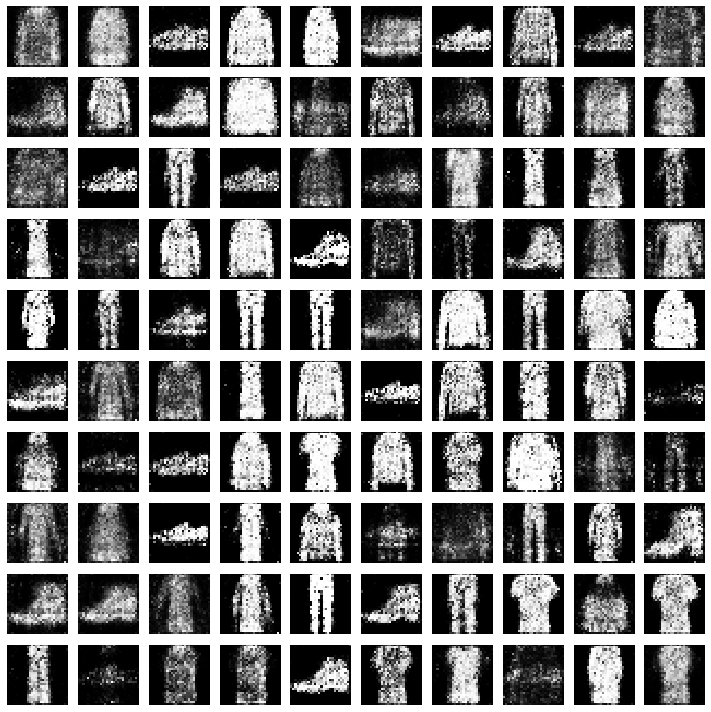

In [14]:
#Sample noisy images 
noise = np.random.normal(0, 1, size=(100, noisedim))
plotimages(noise)

<h5> If we increase more number of epoches then we can cleary observe the noisy image. Due to computational time i am considering only 100 epochs</h5>

<h5> Plot of Generator loss and Discriminator loss with Adam as the optimizer</h5>

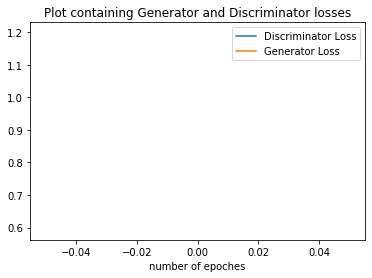

In [15]:
figure, axis = plt.subplots()
plt.plot(generate, label='Discriminator Loss')
plt.plot(discriminate, label='Generator Loss')
plt.title("Plot containing Generator and Discriminator losses")
plt.xlabel('number of epoches')
plt.legend()

<h5>Using RMSprop as the optimizer instead of Adam</h5>

In [16]:
optimizer1="RMSprop"

In [17]:
#Generator for optimizer as RMSprop
def gen1():
    gen1 = Sequential()
    gen1.add(Dense(256, input_dim=noisedim))# Dense Layer which takes the input as noise and gives 256 outputs
    gen1.add(LeakyReLU(0.2)) #Leaky ReLUs allow a small, non-zero gradient when the unit is not active.
    gen1.add(Dense(512))
    gen1.add(LeakyReLU(0.2))
    gen1.add(Dense(1024))
    gen1.add(LeakyReLU(0.2))
    gen1.add(Dense(row*cols*channels, activation='tanh'))#converting the noise into 28 x 28 x 1 images
    gen1.compile(loss='binary_crossentropy', optimizer=optimizer1)
    return gen1

In [18]:
#Discriminator for optimizer as RMSprop
def disc1():
    disc1 = Sequential()
     
    disc1.add(Dense(1024, input_dim=row*cols*channels))
    disc1.add(LeakyReLU(0.2))#Leaky ReLUs allow a small, non-zero gradient when the unit is not active
    disc1.add(Dense(512))
    disc1.add(LeakyReLU(0.2))
    disc1.add(Dense(256))
    disc1.add(LeakyReLU(0.2))
    disc1.add(Dense(1, activation='sigmoid'))# Output layer with sigmoid activation function 
    disc1.compile(loss='binary_crossentropy', optimizer=optimizer1,metrics=['accuracy'])
    return disc1

In [19]:
#We are building GAN by combining Generator and Discriminator
discriminator1 = disc1()
generator1 = gen1()

In [20]:
disc1.trainable = False#Freezing the layers in the disciminator
gan_input1 = Input(shape=(noisedim,)) 
fake_image1 = generator1(gan_input1)# Generating Fake Image
gan_output1 = discriminator1(fake_image1)
gan1 = Model(gan_input1, gan_output1)#Final model concatenating both generator output and real image input
gan1.compile(loss='binary_crossentropy', optimizer=optimizer1,metrics=['accuracy'])


In [21]:
generate1=[]
discriminate1=[]
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batchsize, noisedim))#Generating random noise
        fakex = generator1.predict(noise)# Getting noisy image generated from the generator
        #print(fake_x)
        realx = x_train[np.random.randint(0, x_train.shape[0], size=batchsize)]#Randomly selecting images from our training data
        x = np.concatenate((realx, fakex))#concatenating our real and fake images  
        disc_y = np.zeros(2*batchsize)#creating a matrix of zeros
        disc_y[:batchsize] = 0.9
        dloss = discriminator1.train_on_batch(x, disc_y)#d_loss will give us the output of accuracy and the loss of the discriminator
        ygen = np.ones(batchsize)#creating a matix of ones
        gloss = gan1.train_on_batch(noise, ygen)#g_loss will give us the output of accuracy and the loss of the generator
    print(f'Epoch: {epoch} \t Discriminator (Loss): {dloss[0]}, \t Generator (Loss): {gloss[0]}')
    generate1.append(gloss[0])
    discriminate1.append(dloss[0])

Epoch: 0 	 Discriminator (Loss): 1.067194938659668, 	 Generator (Loss): 0.33450090885162354


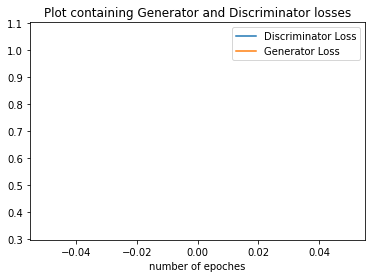

In [22]:
figure, axis = plt.subplots()
plt.plot(generate1, label='Discriminator Loss')
plt.plot(discriminate1, label='Generator Loss')
plt.title("Plot containing Generator and Discriminator losses")
plt.xlabel('number of epoches')
plt.legend()

if we consider more epoches we can see that the generator loss of RMSProp will be decreasing and the discriminator loss on real images will increase.

<b>Conclusion:</b>    The adam optimizer yields the best looking results than RMSprop. we can notice how the discriminator loss on fake images retains a larger value, meaning the discriminator tends to lean towards detecting fake images as real.